# Twitter Api
Solo es con cuenta desarrollador Apis que provee twitter:

    - Tweets : buscar, publicar, filtar , trasmitir, etc
    - Ads: analis de audiencia
    - DM : enviar y recibir respuestas directas, mensajes de bienvenidad,etc.
    - Cuentas y usuarios: admon de cuenta e interacciones con usuarios.
    - Media : Acceder y subir a la plataforma fotos, videos, gifs.
    - Trends: trending topics dada una localización
    - Geo: información de lugares o lugares cerca de una localización.

Librerias de python para trabajar con la api de Twitter
    
    -Tweepy(la mas recomendada y utilizada)
    -Python twitter tools
    -Twython
    -TwitterAPI
    -TwitterSearch


Recoleccion por medio de APIs API(Application Programming Interface) es una bibloteca, un conjunto de funciones que ofrece una cierta
aplicación para ser accesada por otra.

API Twitter: Tweepy modo streaming API REST(Representational State Transfer)

In [1]:
import os
import pandas as pd
import tweepy as tw

In [56]:
#Credenciales
consumer_key = "E6RGBdXGzfrR48iMVy6nJBsvf"
consumer_secret  = "1FPlwaGm3KwkoyrbctcD4DDHWbGRX4RMmNY3vvNB6CLvKPQzVK"
access_token_key = "1485685238135242769-u7AudU9HhKUztYXkZf1BGhG9yyaaht"
access_token_secret = "CcXv3Yx0GnMdPHV8VrfbgK618SOARRVAtiMgyddzlhBkE"

import json
creds = {}
creds = ["CONSUMER_KEY"] = "E6RGBdXGzfrR48iMVy6nJBsvf"
creds = ["CONSUMER_SECRET"] = "1FPlwaGm3KwkoyrbctcD4DDHWbGRX4RMmNY3vvNB6CLvKPQzVK"
creds = ["ACCESS_TOKEN"] = "1485685238135242769-u7AudU9HhKUztYXkZf1BGhG9yyaaht"
creds = ["ACCESS_TOKEN_SECRET"]= "CcXv3Yx0GnMdPHV8VrfbgK618SOARRVAtiMgyddzlhBkE"
with open("twitter_cred.json","w") as arch:
    json.dump(creds, arch)

In [3]:
#Se crea un objeto de la clase(AutoHandeler) para poder utilizar la API
#utilizar la API con python
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token_key, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=False)
#objetov de la clase API que nos permitira realizar las consultas

In [4]:
api

In [5]:
#import twitter 
#api = twitter.Api(consumer_key = '[PF4Ly7b6TdjQvAvQTvdp5NppW]',
 #                 consumer_secret  = '[2jNvv3lu42kdhfun8cTvTMWkk9QLmS9rvNwHwl0nyBf2aGMyBH]',
  #                access_token_key = '[1485685238135242769-Lof6OXLQI53oEHE5p1cke4DiNbD6M6n]',
   #               access_token_secret = '[KMt0SKcEvF6DdX4sj6BMw7pMigIYnIgaP2SDLg6kInRLo]')

In [6]:
#Ejemplo dos variables de busqueda
search_words = "#WillSmith" #- busqueda con este hashtag
data_since = "2022-03-28"

In [7]:
#Se utiliza el metodo cursor para obtener los tweets que obtenga la busqueda
tweets = tw.Cursor(api.search_tweets, q=search_words, lang="en").items(5)
#Cursor tambine devuelve informacion de la quien escribe el tweet y la fehca
tweets

In [8]:
#Despliga los tweets
for tweet in tweets:
      print(tweet.text)
#Otra manera
# var = [tweet.text for tweet in tweets]

RT @ScottMendelson: Why Hollywood Is Hitting The Pause Button On Upcoming #WillSmith Movies via @Forbes by @ScottMendelson https://t.co/TRl…
"Love &amp; Money" - Episode 113 - The Slap Heard Around The World https://t.co/bZ4cNWssIV via @YouTube #willsmith… https://t.co/GuUlaXv1xR
@csm231_ @JenKirkman Bingo

What this #WillSmith situation has exposed is a lot of people like to center themselves… https://t.co/rTxIGCSpWQ
Why Hollywood Is Hitting The Pause Button On Upcoming #WillSmith Movies via @Forbes by @ScottMendelson https://t.co/TRlsbVO9bU via @forbes
RT @offthetabletalk: I like the fact @iamwandasykes was traumatised cause it’s the right directions emotions should be going, this was wron…


In [9]:
#Eliminar los retweets
new_search = search_words + "-fillter:retweets"
new_search

'#WillSmith-fillter:retweets'

In [10]:
tweets = tw.Cursor(api.search_tweets, q=search_words, lang="en").items(5)
for tweet in tweets:
      print(tweet.text)

RT @ScottMendelson: Why Hollywood Is Hitting The Pause Button On Upcoming #WillSmith Movies via @Forbes by @ScottMendelson https://t.co/TRl…
"Love &amp; Money" - Episode 113 - The Slap Heard Around The World https://t.co/bZ4cNWssIV via @YouTube #willsmith… https://t.co/GuUlaXv1xR
@csm231_ @JenKirkman Bingo

What this #WillSmith situation has exposed is a lot of people like to center themselves… https://t.co/rTxIGCSpWQ
Why Hollywood Is Hitting The Pause Button On Upcoming #WillSmith Movies via @Forbes by @ScottMendelson https://t.co/TRlsbVO9bU via @forbes
RT @offthetabletalk: I like the fact @iamwandasykes was traumatised cause it’s the right directions emotions should be going, this was wron…


In [11]:
#Quien publica...
tweets = tw.Cursor(api.search_tweets, q=search_words, lang="en").items(5)
users_locs = [[tweet.user.screen_name, tweet.user.location]for tweet in tweets]
users_locs

[['ComplaymentdO', 'Paris, France'],
 ['prosperityullc', ''],
 ['chillin662', 'The Mississippi Delta'],
 ['ScottMendelson', 'California'],
 ['THunny84', '']]

In [12]:
tweet_text = pd.DataFrame(data=users_locs, columns=['User','Location'])
tweet_text

,User,Location
0,ComplaymentdO,"Paris, France"
1,prosperityullc,
2,chillin662,The Mississippi Delta
3,ScottMendelson,California
4,THunny84,


In [13]:
#Nueva busqueda
new_search = "TecNM -fillter:retweets"
tweets = tw.Cursor(api.search_tweets, q=new_search, lang="es").items(10)
all_tweets = [tweet.text for tweet in tweets]
all_tweets

['@TecNM_MX La comunidad del #TecNM campus Comitán hace llegar su felicitación a estudiantes, docentes y personal del… https://t.co/a63j02R1GA',
 '¿Conoces nuestra carrera de #IngenieríaenDesarrolloComunitario?\n\nhttps://t.co/UpOwYJKBp7\n\nConvocatoria:… https://t.co/D4yO5P4fwN',
 'RT @TecNM_MX: El #TecNM invita a toda la #ComunidadTecNM al #EnVivo de la Ceremonia Protocolaria de Aniversario LXV del campus Orizaba 👉🏻 h…',
 'RT @TecNM_MX: El #TecNM invita a toda la #ComunidadTecNM al #EnVivo de la Ceremonia Protocolaria de Aniversario LXV del campus Orizaba 👉🏻 h…',
 'RT @TecNM_MX: El #TecNM invita a toda la #ComunidadTecNM al #EnVivo de la Ceremonia Protocolaria de Aniversario LXV del campus Orizaba 👉🏻 h…',
 'RT @TecNM_MX: El #TecNM invita a toda la #ComunidadTecNM al #EnVivo de la Ceremonia Protocolaria de Aniversario LXV del campus Orizaba 👉🏻 h…',
 'RT @TecNM_MX: El #TecNM invita a toda la #ComunidadTecNM al #EnVivo de la Ceremonia Protocolaria de Aniversario LXV del campus Orizaba 👉

In [14]:
tweets = tw.Cursor(api.search_tweets, q=new_search, lang="es").items(10)
users_locs1 = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
tweet_tecnm = pd.DataFrame(data=users_locs, columns=['User','Location'])
tweet_tecnm

,User,Location
0,ComplaymentdO,"Paris, France"
1,prosperityullc,
2,chillin662,The Mississippi Delta
3,ScottMendelson,California
4,THunny84,


In [15]:
#Contando palabras
search_term ="COVID -fillter:retweets"
tweets = tw.Cursor(api.search_tweets, q=search_term, lang="en").items(1000)
all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]

['RT @withorpe: New analysis by Oxford University shows fraudsters stole around £37b from the various covid support schemes, more than double…',
 'RT @ryvr: Ignoring COVID does not make it actually go away. It makes all of this worse.',
 "@HNTurtledove You mean their secret gay conversion rays aren't working on you? Clearly your covid booster shot hasn… https://t.co/L1xaztAzrr",
 'RT @paryamirjani: “Ontario Health Minister Christine Elliott says “it doesn’t appear necessary” to take further provincial measures against…',
 '(COVID UPDATE:) 53 Guelph General Hospital staff have COVID https://t.co/tOGUPMY02o via @guelphtoday']

In [16]:
import re
def remove_url(txt):
    
    #Replace = URLs found in a text string with nothing
    #(i.e.  it will remove the URL from the string)
    
    #Parameters
#-----------------
#txt : string
 #   A text string that you want to parse and remove urls
    
  #  Returns
#-------------
#The same txt string urls's removed
 
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [17]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['RT withorpe New analysis by Oxford University shows fraudsters stole around 37b from the various covid support schemes more than double',
 'RT ryvr Ignoring COVID does not make it actually go away It makes all of this worse',
 'HNTurtledove You mean their secret gay conversion rays arent working on you Clearly your covid booster shot hasn',
 'RT paryamirjani Ontario Health Minister Christine Elliott says it doesnt appear necessary to take further provincial measures against',
 'COVID UPDATE 53 Guelph General Hospital staff have COVID via guelphtoday']

In [18]:
all_tweets_no_urls[0].split()

['RT',
 'withorpe',
 'New',
 'analysis',
 'by',
 'Oxford',
 'University',
 'shows',
 'fraudsters',
 'stole',
 'around',
 '37b',
 'from',
 'the',
 'various',
 'covid',
 'support',
 'schemes',
 'more',
 'than',
 'double']

In [19]:
all_tweets_no_urls[0].lower().split()

['rt',
 'withorpe',
 'new',
 'analysis',
 'by',
 'oxford',
 'university',
 'shows',
 'fraudsters',
 'stole',
 'around',
 '37b',
 'from',
 'the',
 'various',
 'covid',
 'support',
 'schemes',
 'more',
 'than',
 'double']

In [20]:
#Creamos una lista de listas que contengan las palabras en minisculas
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['rt',
  'withorpe',
  'new',
  'analysis',
  'by',
  'oxford',
  'university',
  'shows',
  'fraudsters',
  'stole',
  'around',
  '37b',
  'from',
  'the',
  'various',
  'covid',
  'support',
  'schemes',
  'more',
  'than',
  'double'],
 ['rt',
  'ryvr',
  'ignoring',
  'covid',
  'does',
  'not',
  'make',
  'it',
  'actually',
  'go',
  'away',
  'it',
  'makes',
  'all',
  'of',
  'this',
  'worse']]

In [21]:
import itertools #crea objetos iterables, es rapido
import collections # crea colecciones como un dict especial si no exito la palabra agrega al dict
all_words_no_urls = list(itertools.chain(*words_in_tweet))
counts_no_urls = collections.Counter(all_words_no_urls)
counts_no_urls.most_common(15)
#words_in_tweet = [tweet.lower]

[('rt', 715),
 ('covid', 653),
 ('the', 604),
 ('to', 510),
 ('a', 431),
 ('and', 327),
 ('of', 319),
 ('is', 260),
 ('in', 234),
 ('i', 218),
 ('for', 170),
 ('on', 160),
 ('has', 146),
 ('it', 141),
 ('with', 131)]

In [22]:
len(all_words_no_urls)

20337

In [23]:
#Utilizamos pandas
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15), columns=['words','count'])
clean_tweets_no_urls.head()

,words,count
0,rt,715
1,covid,653
2,the,604
3,to,510
4,a,431


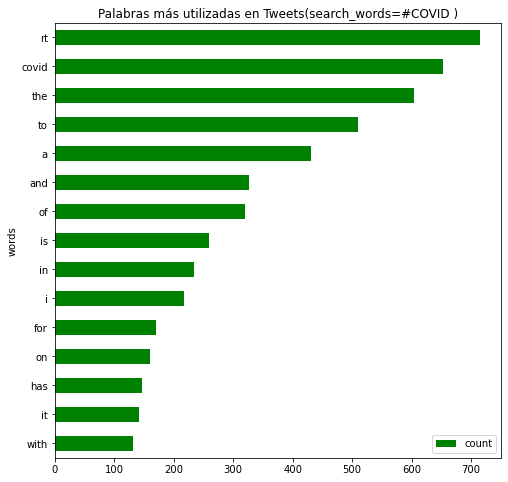

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
#Grafica de barra horizontal
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="green")
ax.set_title("Palabras más utilizadas en Tweets(search_words=#COVID )")
plt.show()

# Sentiments Analysis

Se utiliza para identificar temas de intrés. Se utiliza un rango +1 and -1. Donde +1 es de mayor interés o
de mayor positividad -1 es de menos intrés o de mayor negatividad.

TextBlob se utiliza para calcular los valores de polaridad en tweets. Al crear objetos TextBlob se puede identificar
el valor de polaridad por medio del metodo polarity.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import collections
from textblob import TextBlob

In [26]:
#Cambio climatico
search_term = "#climatechange -fillter:retweets"
tweets = tw.Cursor(api.search_tweets, q=search_term, lang="en").items(1000)
#Remove URLs
tweet_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [27]:
#Analisis de sentimiento en los tweets
#Creamos objeto textblob
sentiment_objects = [TextBlob(tweet) for tweet in tweet_no_urls]
sentiment_objects[0].polarity, sentiment_objects[0] #Se convierte en una tupla
#Imprime el primero

(0.0,
 TextBlob("RT IPCCCH Emissions reduction to address climatechange would need to be on the scale seen in the pandemic year after year but in cont"))

In [28]:
#Creamos una lista de polaridad para cada tweet
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
sentiment_values

[[0.0,
  'RT IPCCCH Emissions reduction to address climatechange would need to be on the scale seen in the pandemic year after year but in cont'],
 [0.8,
  'RT fffwhk As money and profit are prioritized we are driven towards the sixth great mass extinction But for fossil fuel companies it'],
 [0.0,
  'Its NOW or NEVER to fix ClimateChange UN scientists say seankidney CEO of the ClimateBonds agrees Take 1 m'],
 [0.5,
  'Surely the world wont reduce CO2 emissions by 40 by end of decade Climatechange'],
 [0.0,
  'RT AdamRogers2030 This is what climatechange is doing to our planet a rapidlydisappearing glacier in the French Alps Please watch'],
 [0.5,
  'Our Top EcoFriendly Pet Products pets dogs cats ecofriendly climatechange pet'],
 [0.2,
  'RT 4hZimbabwe Protected areas that were set up to safeguard biodiversity and ecological processes are likely to be affected by climate ch'],
 [0.5,
  'RT CALatest The IPCCCHs Working Group III report is out the latest assessment from the worlds clima

In [29]:
#Creamos un df con la polaridad y el tweet
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity","tweet"])
sentiment_df.head()

,polarity,tweet
0,0.0,RT IPCCCH Emissions reduction to address clima...
1,0.8,RT fffwhk As money and profit are prioritized ...
2,0.0,Its NOW or NEVER to fix ClimateChange UN scien...
3,0.5,Surely the world wont reduce CO2 emissions by ...
4,0.0,RT AdamRogers2030 This is what climatechange i...


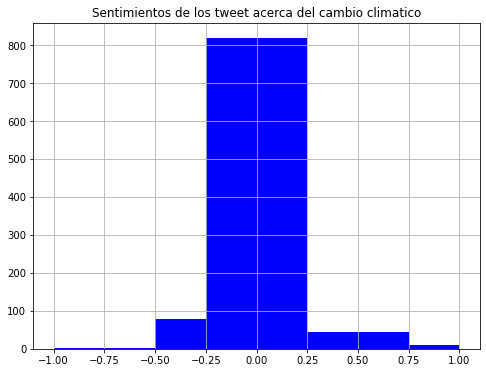

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1], ax=ax, color="b")
plt.title("Sentimientos de los tweet acerca del cambio climatico")
plt.show()

In [31]:
#podmeos eliminar aquellos con polaridad igual a cero
sentiment_df = sentiment_df[sentiment_df.polarity !=0]

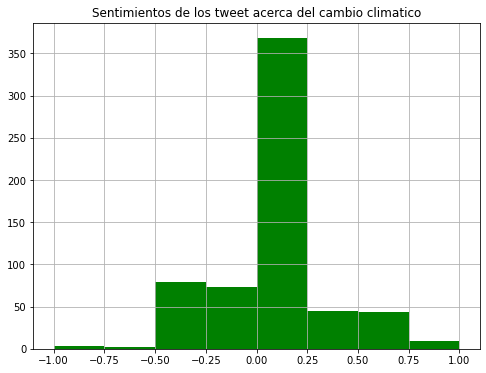

In [32]:
#Grafica sin tomar en cuenta polaridad - 0,0
fig, ax = plt.subplots(figsize=(8,6))
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1], ax=ax, color="g")
plt.title("Sentimientos de los tweet acerca del cambio climatico")
plt.show()

In [33]:
#twpython
from twython import Twython
import json #parar mis credenciales
import pandas as pd

In [49]:
with open("twitter_cred.json","r") as arch:
    c = json.load(arch)

In [54]:
tuits = Twython(c["CONSUMER_KEY"], c["CONSUMER_SECRET"], c["ACCESS_TOKEN"], c["ACCESS_TOKEN_SECRET"])

TypeError: list indices must be integers or slices, not str

In [51]:
tuits.search(q="python", result_type="popular")

NameError: name 'tuits' is not defined

In [42]:
#consultando
consulta = {"q":"bigdata","result_type":"popular","favorite_count":50, "lang":"en"}

In [43]:
info = tuits.search(**consulta)["statuses"]

NameError: name 'tuits' is not defined

In [44]:
info

NameError: name 'info' is not defined

In [ ]:
type(info)

In [48]:
d = {"user":[], "date": [], "text": [], "favorite_count": []}
for e in tuits.search(**consulta)["statuses"]:
        d["user"].append(e["user"]["screen_name"])
        d["date"].append(e["date"]["created_at"])
        d["text"].append(e["text"])
        d["favorite_count"].append(e["favorite_count"])
pandita = pd.DataFrame(d)
pandita.sort_values(by="favorite_count", inplace=True, ascending=False)

NameError: name 'tuits' is not defined

In [46]:
pandita

NameError: name 'pandita' is not defined

In [ ]:
#En streaming usando la clase TwythonStreamer
from twython import TwythonStreamer
import csv